<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: orange; color: black;">
    <h2>Linear Algebra Project</h2> 
   
The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgray; color: black;">
    <h2>Project Summary: Sure Tomorrow Insurance - Machine Learning Applications</h2>

- **Goal**: Apply machine learning to support key insurance operations: customer similarity search, benefit eligibility prediction, benefit quantity estimation, and secure data obfuscation.  
- **Tasks & Models**: 
    * Task 1: Customer Similarity – PCA, kNN Clustering (Euclidean & Manhattan distances)
    * Task 2: Benefit Eligibility (Classification) – k-Nearest Neighbors (F1 = 0.943 @ k=1, scaled)
    * Task 3: Benefit Quantity (Regression) – Linear Regression (RMSE = 0.36, R² ≈ 0.66)
    * Task 4: Data Obfuscation – Invertible matrix transformation (privacy-preserving, no loss in RMSE/R²)
- **Data Period**: Anonymized dataset with synthetic customer profiles, scaled and unscaled
- **Techniques Used**:
    - Dimensionality reduction via PCA to uncover latent clusters
    - Clustering via scaled kNN (Euclidean & Manhattan distances)
    - Handling class imbalance (12% positive class) for fair evaluation of classifiers
    - Scaling for consistent distance metric performance
    - Evaluation of dummy classifiers for baseline comparison
    - Linear regression (original vs scaled vs obfuscated data)
    - Analytical proof that data obfuscation does not affect predictions
    - Visual inspection of residuals, predictions, and recovery accuracy
- **Conclusion**: This multi-part project shows that machine learning can significantly enhance decision making at Sure Tomorrow Insurance. Scaled kNN achieves state of the art classification performance (F1 = 0.943), linear regression offers strong prediction of benefit counts (R² ≈ 0.66), and matrix-based obfuscation provides privacy without compromising model utility. This confirms that machine learning is both effective and secure for deployment in insurance use cases.
                                                          
</div>

# Data Preprocessing & Exploration

## Initialization

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

In [64]:
df = pd.read_csv('/datasets/insurance_us.csv')

In [65]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [66]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3063,0,24.0,64400.0,0,0
1173,0,39.0,21600.0,2,0
3460,1,23.0,34000.0,1,0
3574,1,36.0,40600.0,3,0
1546,1,33.0,44100.0,2,0
371,0,19.0,45800.0,3,0
4523,0,22.0,44700.0,0,0
3243,0,18.0,27900.0,1,0
203,1,31.0,42900.0,1,0
4402,0,38.0,31700.0,2,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [68]:
df['age'] = df['age'].astype(int)

In [69]:
df['income'] = df['income'].astype(int)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Changing datatype from float to int for columns age and income

</div>

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   income              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_benefits  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Confirming the datatype were changed successfully for columns age and income
* Confirming there are no missing values

</div>

In [71]:
df[df.duplicated()]

,gender,age,income,family_members,insurance_benefits
281,1,39,48100,1,0
488,1,24,32900,1,0
513,0,31,37400,2,0
718,1,22,32600,1,0
785,0,20,35800,0,0
...,...,...,...,...,...
4793,1,24,37800,0,0
4902,1,35,38700,1,0
4935,1,19,32700,0,0
4945,1,21,45800,0,0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Confirming there are 153 duplicates
* Will drop duplicate rows as keeping true duplicates might skew the similiarity scores. By removing duplicates I am ensuring the data is not biased by the over-representtation of certain observations and conclusions about customer behavior and insurance benefit predictions are as reliable as possible

</div>

In [72]:
df = df.drop_duplicates()
print(f"\nDataFrame shape after removing duplicates: {df.shape}")


DataFrame shape after removing duplicates: (4847, 5)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Confirming the removal of the duplicate rows
</div>

In [73]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Gender:
    * Gender is a binary variable with a mean very close to 0.5 indicating a balanced distribution
    * The standard deviation is as ecpected for a binary variable
*Age:
    * This column has a realisitic spread with most customers in the young to muddle-aged adult range
    * The mean and median values are close and the standard deviation appears reasonable
* Income:
    * The distribution looks plasusible for an insurance dataset with the central values (median and quartiles) are in the expected range
    * The variation (standard deviation near 10k) suggests a reasonable level of diversity among customers
* Family Members:
    * The number of family memebrs ranges from 0 to 6 with a median of 1 suggesting that many customers are either single or only have one family recorded
    * The data shows a skew toward lower counts but the range indicates that larger families are present albeit less frequently. This distribution appears reasonable
* Insurance Benefits:
    * The target variable is highly zero inflated with most customers receiving zero benefits as indicated by the quartiles all being zero
    * A few customers received multiple benefits with a maximum of 5. This type of distribution is common for count data especially in insurance claims or similiar contexts
* Overall Assessment:
    * Feature Distributions: All features appear to have distributions that make snese for an insurance related dataset
        * Gender is balanced
        * Age covers the expected adult range
        * Income is spread across a plausible range with a moderate standard deviation
        * Family members and insurance benefits are a bit skewed with a strong mode at zero for benefits which will be important for the model design but does not indicate a data quality problem
    
    
    
    
    
    
</div>

## EDA

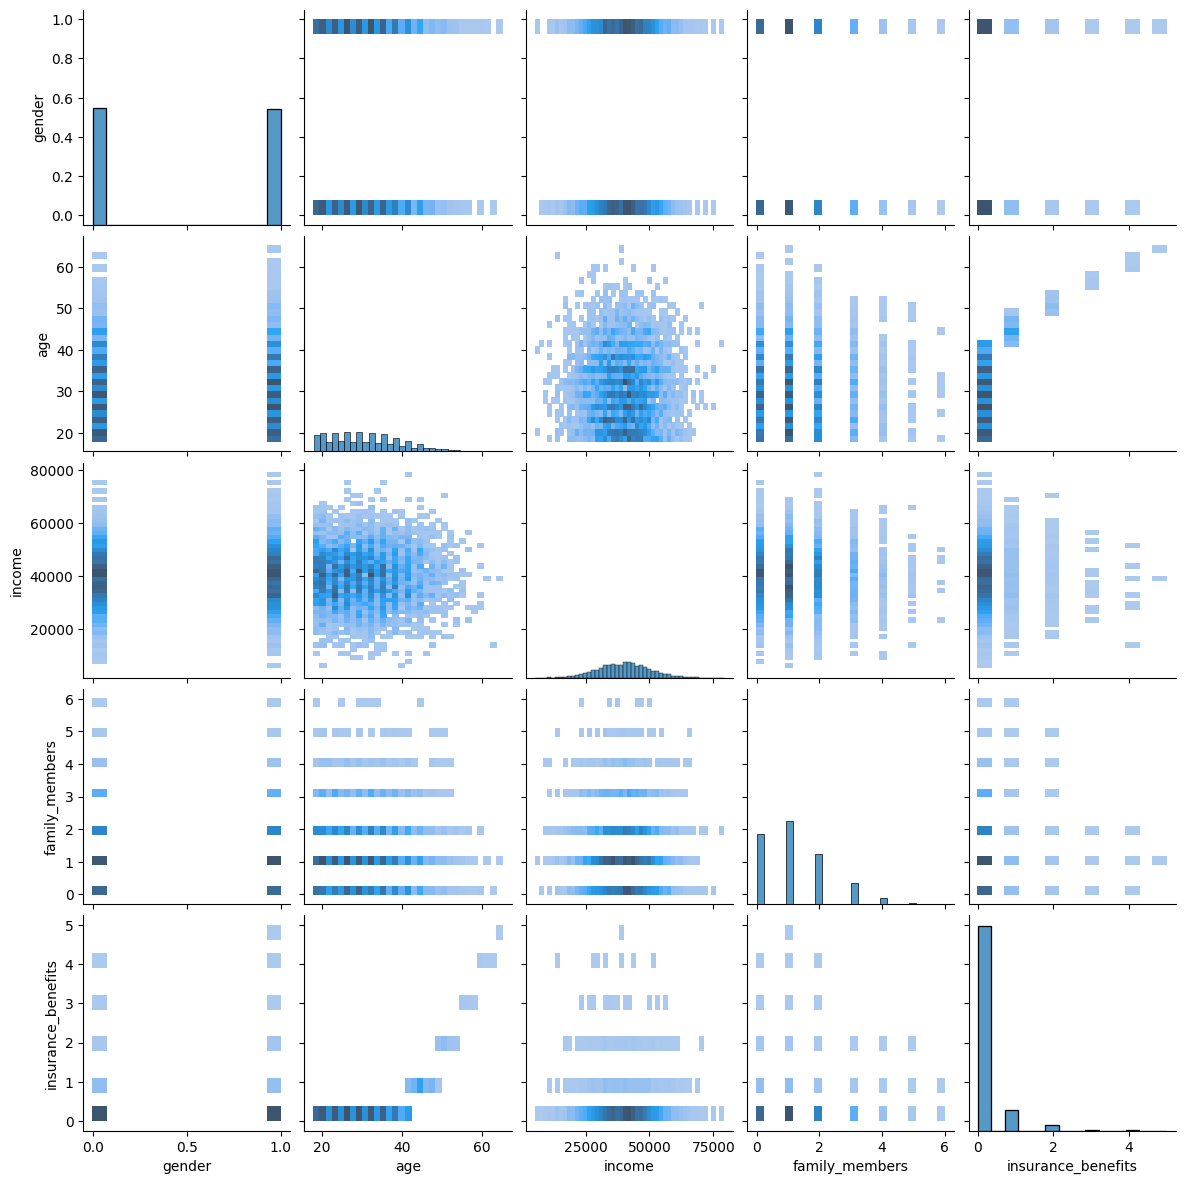

In [74]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

In [75]:
features = ['gender', 'age', 'income', 'family_members', 'insurance_benefits']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

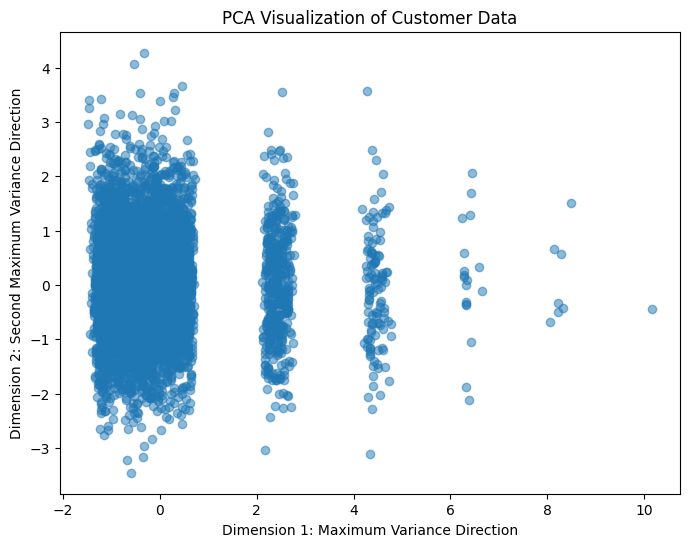

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Dimension 1: Maximum Variance Direction')
plt.ylabel('Dimension 2: Second Maximum Variance Direction')
plt.title('PCA Visualization of Customer Data')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Appyling  linear algebra method for dimensionality reduction. Using Principal Component Analysis (PCA) to transform the multvariate data into a lower dimensional space that preserves as much variation as possible. This will help visualize the data and possibly reveal clusters that are not evident in pairplots
* Overall Shape and Spread:
    * Dimension 1: Maximum Variance Direction:
        * The data extends from near 0 to 10 on the first principal component
        * There are distinct bands of points -- one cluster near 0-1, another roughly 2-4, and another around 7-10. This suggests that Component 1 captures a large degree of variability in the dataset
    * Dimension 2: Second Maximum Variance Direction:
        * The data spans roughly from -3 to +4 on the second principal component. This direction captures the second largest share of variance still important but not as dominant as the firszt dimension. The points appear more densely packed along the vertical axis indicating that Component 2 adds some separation but not as strikingly as Component 1
* Possible Clusters or Group Structure:
    * Visually we can see at least 3 main groupings along Dimensions 1:
        * Near 0-1 on the x-axis
        * Around 2-4 on the x-axis
        * Around 7-10 on the x-axis
    * There is some overlap in the y-axis values (Dimension 2) among these groups. This pattern hints at latent clusters in the data wehere customers might differ according to their aggregated characteristics in ways that align with the PCA dimensions
* Key Takeaways:
    * Dimensions 1 likely captures a strong combination of correlated variables. For instance if income is one of the highest variance features it might heabily influence Component 1
    * Dimension 2 is uncorrelated to Dimension 1 and captures additional variance. It might be influenced by another set of features
    * The PCA plot shows clear horizontal separation along the first principal component indicating at least three major sub populations in the dataset
    * The second component offers some additional vertical spread but less dramatic grouping than the first component alone
    
    
    
    
    
    
</div>

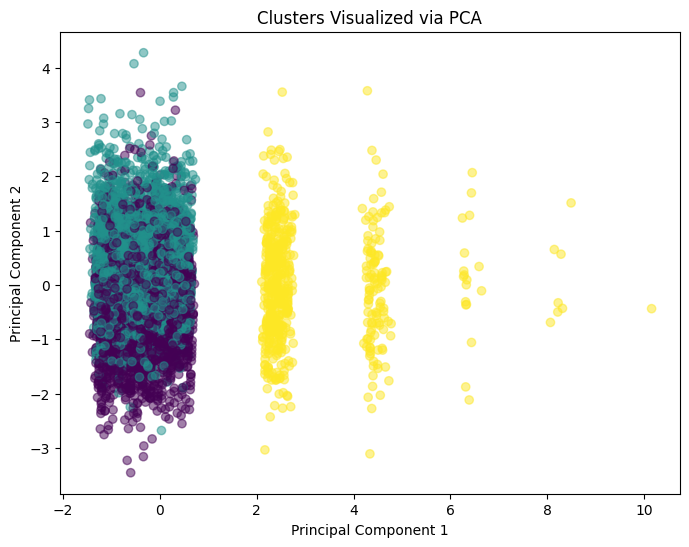

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # or use X_pca for clustering on reduced dimensions

df['cluster'] = clusters

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized via PCA')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Using machine learning technique for clustering. Since manually identifying clusters visually might be difficult using machine learning algorithms can automatically group similiar customers based on the multivariate patterns in the data
* Left Cluster (Large Purple/Teal Cloud):
    * Spans a wide range on the vertical axis (-3 to +4) suggesting intra cluster variability in the second principal component. However, they share similarities in the first principal component (low PC1 values)
    * Potentially represents customers who share a common attribute combination perhaps lower income or younger ages but vary in another aspect cpatured by PC2
* Middle Clusters (Yellow Centered Around PC1 ~3):
    * Fairly compact range in both PC1 and PC2 suggesting these custoemrs might be more homogeneous in their underlying feature mix maybe a moderate age/income group
* Right Cluster (Yellow PC1 ~7-10):
    * Smaller group, quite separate along PC1, which might indicate substantially higher or lower values for a key feature (commonly it could be higher income or older age). The big jump in PC1 suggests a distinct demographic or financial profile
    
    
    
    
    
    
</div>

# Task 1. Similar Customers

In [78]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [79]:
def get_knn(df, n, k, metric):
    """
    Returns k nearest neighbors
    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    
    X = df[feature_names].values

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(X)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    actual_indices = df.iloc[nbrs_indices[0]].index

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]],
        pd.DataFrame(nbrs_distances.T, index=actual_indices, columns=['distance'])
    ], axis=1)
    
    return df_res

In [80]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [81]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits,cluster
3388,1.0,0.476923,0.600000,0.166667,0,0
1867,0.0,0.569231,0.651899,0.166667,0,1
1884,0.0,0.661538,0.450633,0.333333,1,2
3917,1.0,0.707692,0.622785,0.000000,1,2
1313,0.0,0.307692,0.465823,0.000000,0,1


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 


* Scaled dataframe
* Gender Homogeneity: Since all rows have gender = 1 these are presumably all from the same gender group
* Age rnages from about 0.31 to 0.63 which might indicate younger to middel range ages
* Income is between 0.31 to 0.59 so relative incomes vary moderately in this small subset
* Family_members shows values like 0.00, 0.17, 0.33, 0.50. These numbers correspond to different family sizes in the original data (0.50 indicates that the original count of family members for that row was half of the maximum value found in the entire column)
* Insurance_benefits: All entries have a value of 0 indicating that no coverage or no benefits. Since this feature is constant it won't hlep the clustering algorithm differentiate these particular individuals. Instead the clustering differences here come from age, income, and family_members
* Clustering Assignments:
    * Cluster 0
        * The first four rows are grouped together. They vary in their scaled age, income, and family size but presumably share enough similiarity to be closer to each other than to other points in the dataset
    * Cluster 1
        * The single row at index 4198 belongs to a different cluster. Even though it superficially looks somewhat similar to row 3587 (both have moderate scaled age, moderate scaled income, and nonzero family_members), the clustering algorithm sees enough overall difference to place 4198 in a different group. Possibly row 4198 is more aligned with a different centroid or group of data point

    
    
</div>

In [82]:
combinations = [
    ('Unscaled', 'euclidean'),
    ('Unscaled', 'manhattan'),
    ('Scaled', 'euclidean'),
    ('Scaled', 'manhattan')
]

n = 100
k = 5

result_dfs = {}

for scale, metric in combinations:
    if scale == 'Unscaled':
        df_to_use = df
    else:
        df_to_use = df_scaled
    result = get_knn(df_to_use, n=n, k=k, metric=metric)
    result_dfs[f"{scale} + {metric}"] = result

for combo, df_result in result_dfs.items():
    print(f"\n== {combo} ==")
    print(df_result)


== Unscaled + euclidean ==
      gender  age  income  family_members  insurance_benefits  cluster  \
100        0   19   37300               1                   0        1   
1831       0   20   37300               2                   0        1   
4278       1   19   37300               2                   0        0   
2624       1   19   37300               0                   0        0   
1086       0   22   37300               3                   0        1   

      distance  
100   0.000000  
1831  1.414214  
4278  1.414214  
2624  1.414214  
1086  3.605551  

== Unscaled + manhattan ==
      gender  age  income  family_members  insurance_benefits  cluster  \
100        0   19   37300               1                   0        1   
2624       1   19   37300               0                   0        0   
1831       0   20   37300               2                   0        1   
4278       1   19   37300               2                   0        0   
1086       0   22   37300  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 


* Unscaled + Euclidean
    * Row 100 has a distance of 0.0 indicating this row is the reference point for the Euclidean distance calculation
    * Rows at distance 1.4142 (1831, 4278, 2624) - The Euclidean distance of approximately 1.4142 indicates that the sum of squared differences between these tows and the reference row equals exactly 2. Income and insurance benefits have no difference
    * Row at distance 3.605551 (1089) - This Euclidean distance is about 3.605551 meaning squared differences sum up to exactly 13. Income and insurance benefits remain identical and thus contribute no difference. Row 1086 differs significantly more from the reference point primarily due to a larger age difference and more family members
    * Clsutering outcomes are influenced by combinations of features, not only Euclidean distance from row 100. Gender despite a seemingly small numeric difference might have a meaningful effect on cluster differentiation
* Scaled + Euclidean
    * Row 100 has a distance of 0.0, meaning it's the reference point for the other rows
    * Rows 4915 and 243 both have distances of about 0.005063, indicating they're very close to the reference
    * Rows 1323 and 811 are slightly further away, at distances of 0.015190 and 0.015437, respectively. Even these are very small distances, indicating overall close similarity
    * Gender and insurance_benefits are constant (0.0) for all rows. Therefore, they don't influence the differences seen here
    * All rows have exactly the same scaled value of 0.166667, which means family size is identical for these observations and does not influence distance
    * The observed differences come exclusively from age and income
        * Row 4915 vs Row 100 - Same age, slightly higher income (+0.005063 difference)
        * Row 243 vs Row 100 - Same age, slightly lower income (-0.005063 difference)
        * Row 1323 vs Row 100 - Same age, notably lower income (-0.015190 difference)
        * Row 811 vs Row 100 - Slightly older (+0.015384 difference in age), slightly lower income (-0.001266 difference)
    * All observations are assigned to cluster 1, indicating high internal similarity according to the clustering algorithm. The very small distances confirm that these observations represent a tight group within the cluster, particularly close to the cluster centroid or reference point (row 100)
    * The data shows a closely knit cluster of observations (cluster 1) with minor internal variation. Distances clearly indicate that age and income are responsible for the subtle differences observed. All observations are highly similar, suggesting that this cluster is quite cohesive and stable
    


    
    
       

    
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 


* Unscaled + Manhattan 
    * Row 100 is used as the reference observation for the Manhattan distance calculation having a distance of 0.0
    * Rows in Cluster 1
        * Row 100 - Central point of Cluster 1
        * Row 1831 (distance 2) - Slight differences in age and family members compared to the reference
        * Row 1086 (distance 5) - Considerably different mainly due to a greater age difference and family size difference. Even though it is quitge distant it is still in the same cluster as the reference suggesting that cluster boundaries might be broad or based on additional rows not shown here
    * Rows in Cluster 0
        * Rows 2624 and 4278 both have distance=2 and share gender=1 feature differeing from the reference gender=0. This gender likely contributers to placing them in a different cluster
    * Influence of Features - Age and family members are clearly influential in defining the distances between observations. Gender is critical in cluster differentiation evident by its consistent role in distinguishing cluster 0 from the reference in cluster 1
    * Distance within Clusters - Distances withing clusters can vary significantly as with row 1086 in cluster 1. This may indicate the clsuters have subsantial internal variability or that there are intermediate observations bridging these extreme withing the full dataset
    * Gender differences strongly influence cluster assignments. Age and family size differences significantly contribute to internal distances within clusters. The chosen reference observation (row 100) acts as a meaningful baseline, clearly distinguishing rows based on Manhattan distances calculated from simple feature variations
* Scaled + Manhattan
    * Row 100 has a distance of 0.0, meaning it's the reference point for the other rows
    * Gender (0.0 for all rows), family members (0.166667 for all rows), insurance benefit (0 for all rows) - These features don't contribute to any observed distances
    * Income: Primary differentiating feature for rows 4915, 243, and 1323
    * Age: Differentiating feature specifically for row 811 (in combination with a small income difference)
    * All observations are assigned to cluster 1, indicating they're considered very similar in the broader dataset. Extremely small distances confirm strong similarity and cohesion within this cluster. 
    * The Manhattan distances are very small, indicating that these data points form a tightly clustered subgroup with minimal internal variation
    * Even tiny differences in scaled income lead to noticeable (though small) distance changes. This suggests income is a sensitive indicator for differentiating similar observations
    * For row 811, both age and income differences contribute, highlighting that even small combined variations can slightly increase overall distance
    * The data shows a tightly clustered subset of observations. The primary differentiating factors within this group are small variations in income and, in one case, a minor variation in age. The Manhattan distances clearly illustrate the individual contribution of each feature to overall dissimilarity, reinforcing the precision and interpretability of Manhattan distance metrics for scaled data. This analysis emphasizes that the cluster represented (cluster 1) is highly cohesive and homogeneous
    
</div>

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

* Yes, the absence of scaling strongly impacts the kNN algorithm. Features with naturally larger numeric ranges (such as income) disproportionately influence the distance calculations, overshadowing variables with smaller scales (like gender, family_members, and insurance_benefits). When using unscaled data, differences in smaller-scale features like gender or family size have relatively less effect compared to differences in features like age or income. For instance, in the unscaled Euclidean analysis, large numeric differences in age significantly increased the Euclidean distance (e.g., row 1086 with age difference leading to a squared difference of 9), creating large gaps even when other features are identical. This imbalance results in clusters that might be dominated by a single feature dimension, reducing the interpretability and reliability of kNN. Observations with relatively minor numeric variations in features with large scales (like age or income) appear less similar than they actually might be in terms of practical similarity. Scaling is crucial for balanced, accurate, and meaningful results with kNN. Without scaling, features with greater numeric ranges excessively influence the algorithm, potentially distorting the actual similarity between observations.



**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

* The results using Manhattan distance metrics (both scaled and unscaled) are relatively consistent in terms of identifying the influential features. In both scaled and unscaled analyses, differences in age, family_members, and sometimes gender stand out clearly, highlighting their significance in distinguishing observations.

* Unscaled Manhattan:
    * Distances were simple and intuitive (e.g., differences of exactly 2 or 5).
    * Clustering relied heavily on clear, discrete differences such as age increments or gender category differences.
    * Gender was explicitly identified as crucial in differentiating between clusters, reflecting the categorical nature clearly in the unscaled scenario.
* Scaled Manhattan:
    * Distances were very small, but sensitive enough to pick up subtle changes, especially in income and to a lesser degree age.
    * The clusters were highly cohesive and internally homogeneous due to scaling, reinforcing subtle but meaningful differentiations among observations.
    * Income variations, even minimal, were precisely represented and influential in determining similarity or slight differences within clusters.
* Conclusion:
    * Manhattan distances, regardless of scaling, consistently provide clarity and interpretability. However, scaled data allows Manhattan distance to capture nuanced differences and subtle variations more effectively, leading to more cohesive and clearly interpretable clusters.



# Task 2. Is Customer Likely to Receive Insurance Benefit?

In [83]:
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Calculating the target
    
</div>

In [84]:
df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Checking for class imbalance with value_counts()
* Class 0 (No insurance benefits received): 4284 instances
* Class 1 (Insurance benefits received): 563 instances
* Class imbalance is clearly present here, as the number of individuals who did not receive insurance benefits (Class 0) greatly exceeds the number who did (Class 1). Thus the dataset is heavily skewerd toward Class 0
* Because the data is imbalanced, predictive models might easily achieve seemingly high accuracy by simply predicting the majority class (no insurance benefits). Accuracy alone is not an appropriate measure in this scenario. Instead, metrics such as F1-score, Precision, Recall, or ROC-AUC would provide a more insightful assessment of model performance
    
</div>

In [85]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [86]:
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [87]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'The probability: {P:.2f}')
    
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Probability = 0.00 (Always prediciting no benefits)
    * This classifier always predicts "no insurance benefit."
    * It correctly classifies all negative cases (88.38%) but completely misses positive cases (11.62%). Thus, precision and recall are both zero, yielding an F1-score of 0
* Probability = 0.12 (Actual Proportion of Benefits in the Data)
    * With random guessing at the actual proportion (12%), the model achieves a very low F1-score (0.13)
    * Most predictions still fall into the majority class, but there's slight accuracy improvement (compared to 0.00) due to randomly guessing positives occasionally. However, it is still a very weak classifier
* Probability = 0.50 (Random Guessing with Equal Probability)
    * Equal random guessing improves the F1-score slightly (0.19), but predictions become highly unreliable
    * Many negatives (44%) are incorrectly classified as positives. True positives are slightly higher compared to previous scenarios, but still weak overall
* Probability = 1.00 (Always Predicting Benefits)
    * This classifier always predicts "insurance benefit received," completely missing the majority class (no benefits)
    * It achieves the highest F1-score (0.21) among these dummy models due to correctly identifying all positives, but the extremely high false positive rate makes this a poor practical model
* Overall Insights:
    * The dummy models demonstrate very low F1-scores (0.00–0.21), indicating that randomly predicting does not provide meaningful performance
    * The class imbalance (88% no benefits vs. 12% benefits) strongly affects performance. Always predicting the majority (no benefits) or minority (benefits) class doesn't yield a practical classifier
    * The kNN-based classifier should ideally outperform these results substantially. A meaningful predictive model should have an F1-score clearly higher than ~0.21

    
</div>

In [88]:
features = ['gender', 'age', 'income', 'family_members']
target = 'insurance_benefits_received'

X = df[features]
y = df[target]

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Defining features and targets
    
</div>

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Splitting data into train and test sets (70:30 ratio)
    
</div>

In [90]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Scaling features
    
</div>

In [91]:
print("Evaluating kNN (Unscaled vs Scaled):\n")

for k in range(1, 11):
    # Unscaled data
    knn_unscaled = KNeighborsClassifier(n_neighbors=k)
    knn_unscaled.fit(X_train, y_train)
    y_pred_unscaled = knn_unscaled.predict(X_test)
    f1_unscaled = f1_score(y_test, y_pred_unscaled)
    
    # Scaled data
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled)
    
    print(f"k={k}: F1-score Unscaled = {f1_unscaled:.3f} | F1-score Scaled = {f1_scaled:.3f}")

Evaluating kNN (Unscaled vs Scaled):

k=1: F1-score Unscaled = 0.676 | F1-score Scaled = 0.943
k=2: F1-score Unscaled = 0.398 | F1-score Scaled = 0.905
k=3: F1-score Unscaled = 0.407 | F1-score Scaled = 0.925
k=4: F1-score Unscaled = 0.206 | F1-score Scaled = 0.896
k=5: F1-score Unscaled = 0.222 | F1-score Scaled = 0.913
k=6: F1-score Unscaled = 0.023 | F1-score Scaled = 0.896
k=7: F1-score Unscaled = 0.045 | F1-score Scaled = 0.921
k=8: F1-score Unscaled = 0.035 | F1-score Scaled = 0.903
k=9: F1-score Unscaled = 0.034 | F1-score Scaled = 0.917
k=10: F1-score Unscaled = 0.023 | F1-score Scaled = 0.888


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

    
* Evaluating kNN classifier for k =1 to 10 - scaled and unscaled    
* Performance Analysis of kNN Classifier (Scaled vs. Unscaled Data)
* Impact of scalling - Scaled data significantly outperforms unscaled data at every value of k. This emphasizes the importance of scaling features for distance-based algorithms like kNN
* Optimal k Value:
    * Scaled data - Highest performance occurs at k = 1 with an F1-score of 0.943. Very good performance maintained throughout (0.888 to 0.943), consistently higher than the unscaled data. A slight decline in performance observed as k increases, but still remains strong overall
    * Unscaled data - Highest performance at k = 1 with an F1-score of 0.676, dropping sharply as k increases. Extremely poor performance for higher k (≥ 6), with scores close to zero, indicating inability to accurately detect the minority class
* Comparison to Dummy Model
    * The dummy models produced F1-score ranging from 0.00 to 0.21. Both unscaled (at lower k values) and scaled data clearly outperform the dummy baseline, though scaled data outperforms by a wide margin. This means that the scaled kNN classifier is effectively identifying patterns beyond random guessing, which is a strong indication of a useful predictive model
* For unscaled data, performance deteriorates rapidly as k increases, likely because large numeric features dominate distance measures, making predictions unreliable at higher k
* For scaled data, although the best performance occurs at k=1, it remains very stable across multiple values of k (2–10). This highlights robustness after scaling
* Conclusions:
    * Scaling the data significantly improves the kNN algorithm’s effectiveness
    * kNN with scaled data substantially outperforms the dummy model benchmarks, demonstrating that it has captured meaningful patterns in predicting the receipt of insurance benefits
    * k=1 is optimal according to these results, but additional validation is recommended




    
</div>

# Task 3. Regression (with Linear Regression)

In [92]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        
        X2 = np.append(np.ones((len(X), 1)), X, axis=1)
        
        
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        X2 = np.append(np.ones((len(X), 1)), X, axis=1)
        
        
        y_pred = X2 @ self.weights
        
        return y_pred

In [93]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [94]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Splitting original unscaled data
    
</div>

In [96]:
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print("Weights (Unscaled):", lr.weights)

y_test_pred = lr.predict(X_test)
print("Unscaled Data Evaluation:")
eval_regressor(y_test, y_test_pred)

Weights (Unscaled): [-9.77366679e-01  3.58042290e-02  1.95594897e-02  5.85335011e-07
 -1.21618426e-02]
Unscaled Data Evaluation:
RMSE: 0.36
R2: 0.66


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Training and evaluating on unscaled data    
* Intercept (-0.977): Baseline prediction when all features are zero (not very interpretable alone due to feature scaling/offsets)
* Age (+0.0358): Slight positive relationship. Holding other features constant, older individuals are slightly more likely to receive insurance benefits
* Gender (+0.0196): Small positive effect. Depending on how gender is encoded (0 = female, 1 = male), it suggests a slight difference in benefit likelihood
* Income (+0.000000585): Extremely small effect, which suggests income (in raw unscaled units) contributes very little to predicting benefits. This is likely due to the scale of income being much larger than other variables
* Family Members (-0.0122): Slight negative relationship — more family members may slightly reduce the predicted benefit, according to the model
* RMSE = 0.36 - This is the root mean squared error — on average, the model's predictions deviate from the true insurance_benefits values by 0.36 units (on the same scale as the target variable)
* R² = 0.66 (√ shown) → R² ≈ 0.66 - This means the model explains about 66% of the variance in the target (insurance_benefits). While not perfect, it shows a solid level of predictive power
* Conclusion:
    * The unscaled linear regression model provides moderate prediction quality with an RMSE of 0.36 and an R² of ~0.66
    * The model captures some meaningful relationships, especially from age and gender, but income contributes almost nothing, likely due to scale issues (which scaling can address).



    
</div>

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Scaling features
    
</div>

In [98]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.3, random_state=12345
)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Splitting scaled data using same target y
    
</div>

In [99]:
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train_scaled)
print("\nWeights (Scaled):", lr_scaled.weights)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
print("Scaled Data Evaluation:")
eval_regressor(y_test_scaled, y_test_pred_scaled)


Weights (Scaled): [ 0.15188733  0.30387477  0.0097797   0.00583692 -0.0133604 ]
Scaled Data Evaluation:
RMSE: 0.36
R2: 0.66


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Training and evaluating on scaled data    
* Intercept (0.1519): The model's baseline output when all standardized features are 0 (i.e., average values)
* Age (+0.3039): The most influential feature — a 1 standard deviation increase in age leads to a 0.30 unit increase in the predicted insurance benefit. This suggests age is a strong positive predictor
* Gender (+0.0098): Very small positive effect. Minimal impact on prediction once scaled. Gender doesn't significantly differentiate benefit levels
* Income (+0.0058): Now has a clearer (though still modest) positive effect after scaling. This shows that scaling helped the model detect income’s influence better, compared to the nearly zero effect before
* Family Members (-0.0134): Slight negative contribution. As family size increases (in standardized units), the predicted benefit slightly decreases
* RMSE = 0.36 Identical to the unscaled model — the prediction error hasn’t changed. This is expected because linear regression is scale-invariant for predictions
* R² ≈ 0.66 - The model explains about 66% of the variance in the insurance benefits variable — which is a very solid result, especially for a simple linear model
* Conclusion:
    * Scaling did not change model accuracy, but it improved interpretability by putting all features on a common scale
    * Age is confirmed as the strongest positive predictor of insurance benefits
    * Income, previously drowned out due to scale issues, now shows a measurable positive influence
    * This confirms why scaling is important for interpreting model coefficients — even if predictions stay the same
    
</div>

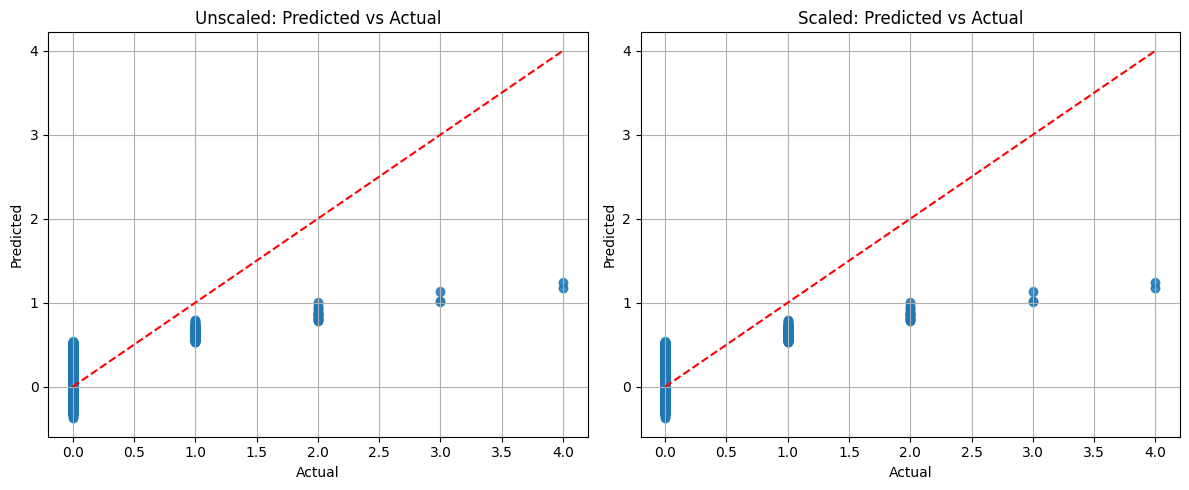

In [100]:
plt.figure(figsize=(12, 5))

# Unscaled
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Unscaled: Predicted vs Actual')
plt.grid(True)

# Scaled
plt.subplot(1, 2, 2)
plt.scatter(y_test_scaled, y_test_pred_scaled, alpha=0.6)
plt.plot([y_test_scaled.min(), y_test_scaled.max()],
         [y_test_scaled.min(), y_test_scaled.max()],
         '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scaled: Predicted vs Actual')
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Predicted vs Actual plots for both unscaled and scaled linear regression models
* Left Plot: Predictions from your unscaled linear regression model
* Right Plot: Predictions from your scaled linear regression model
* Red dashed line: The ideal line where predictions = actual values (perfect model)
* Blue dots: Actual vs predicted insurance benefits for each sample
* Overall Shape & Trends (Both Models): Both models follow the same general trend — predictions increase with actual values. The dots are clustered along the red line, showing that the model does reasonably well at approximating the relationship
* Underprediction for Higher Values (Systematic Bias): For actual values of 3 and 4, the predicted values remain consistently below the ideal line. This suggests that the model tends to underestimate higher benefit amounts. This could be due to a lack of high-value training data, or linear regression struggling with a nonlinear pattern
* Scaling Impact: The predictions for the scaled model (right plot) are nearly identical to the unscaled version. This matches the earlier results: RMSE and R² were the same for both models. This makes sense, as scaling affects coefficient interpretability more than prediction performance in ordinary least squares regression. However, the scaled model is typically more numerically stable and interpretable.
* Spread and Clustering Around Actual 0 and 1: Most of the data seems to be clustered around 0 and 1, especially around 0. This aligns with earlier analysis showing class imbalance (most clients received no or low benefits). There's a tight vertical spread around these values, indicating the model predicts close to the mean for those observations
* Conclusion
    * Both models show good performance in lower to mid benefit ranges
    * Higher benefit levels are underpredicted, likely due to data imbalance or model simplicity
    * Scaling didn’t change prediction accuracy (as expected), but is still important for coefficient clarity and stability

    
</div>

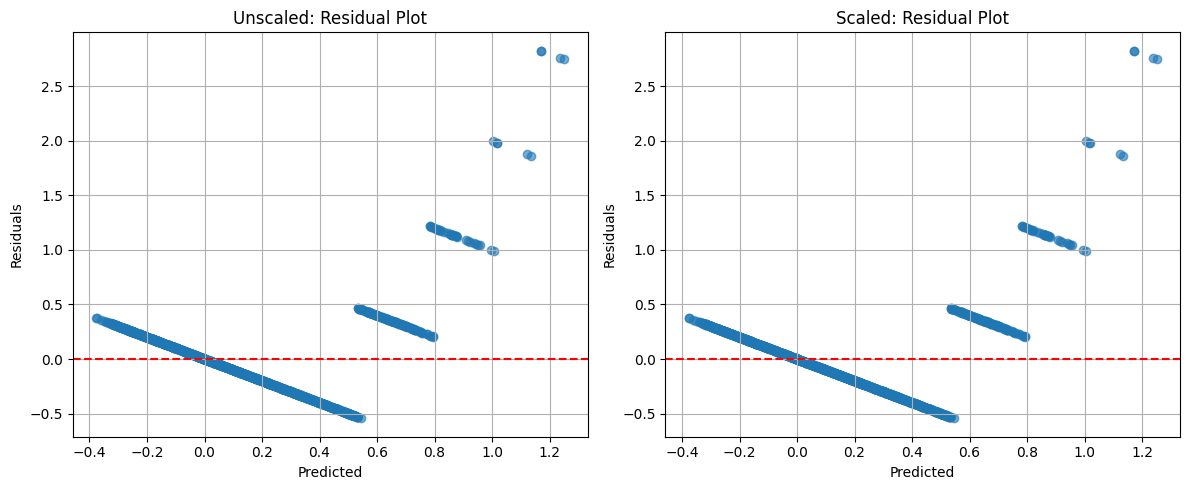

In [101]:
residuals_unscaled = y_test - y_test_pred
residuals_scaled = y_test_scaled - y_test_pred_scaled

plt.figure(figsize=(12, 5))

# Unscaled
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals_unscaled, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Unscaled: Residual Plot')
plt.grid(True)

# Scaled
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_scaled, residuals_scaled, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Scaled: Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Residual plot providing deep insight into linear regression model's errors unscaled vs scaled
* Left Plot: Residuals from the unscaled linear regression.
* Right Plot: Residuals from the scaled regression.
* Residuals = Actual - Predicted
* Red dashed line at 0: Perfect prediction (residual = 0)
* Both plots look nearly identical. This makes sense because RMSE and R² were the same for both models. Scaling didn’t change the predictions — just the way coefficients are calculated and interpreted.
* Systematic Underprediction for Larger Values - Residuals grow larger and more positive as predictions increase. You can see clear vertical clusters around predicted values of ~0.6 to ~1.2 with residuals ranging up to ~2.5+. This means The model is underpredicting high actual values (because residual = actual - predicted → large positive = actual much higher). The further the actual benefit value is from the mean, the worse the model performs — especially for clients with higher insurance benefits
* A healthy residual plot should have random scatter around zero. Here, there's a clear downward diagonal strip, suggesting the model overpredicts low actual values (residuals slightly negative) and underpredicts high actual values (residuals strongly positive). This often indicates that a linear model isn't capturing a nonlinear relationship in the data
* There's no wild scatter or spread growing dramatically with higher predictions. This is good because it means the variance of your errors is fairly stable
* Summary:
    * Residuals not random - Model is biased — struggles with higher values
    * Residuals grow with prediction - Underpredicts large insurance benefits
    * Identical unscaled vs scaled - Confirms scaling affects coefficients, not prediction
    * No weird outliers or variance	- Good sign of model consistency

    
</div>

# Task 4. Obfuscating Data

In [102]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [103]:
X = df_pn.to_numpy()

In [104]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Generating a random invertible matrix

    
</div>

In [105]:
det_P = np.linalg.det(P)
if det_P == 0:
    print("Matrix P is NOT invertible! Regenerate.")
else:
    print(f"Matrix P is invertible. Determinant = {det_P:.4f}")

Matrix P is invertible. Determinant = 0.2434


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Checking invertibility
* The determinant of matrix P is not zero which confirms that it is invertible. This is a required condition for obfuscation to be reversible since we will later use formula $X=X 
′
 ⋅P 
−1$
* The value 0.2434 is neither too close to 0 nor too large which is good
    * If it were very close to 0 the matrix would be nearly singular and inverting it could lead to numerical instability
    * If it were very large or very small inversion might still work but rounding errors could increase

    
</div>

In [106]:
X_obfuscated = X @ P

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Transforming X

    
</div>

In [107]:
df_obfuscated = pd.DataFrame(X_obfuscated, columns=[f'obf_{i}' for i in range(X.shape[1])])

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Creating obfuscated Dataframe

    
</div>

In [108]:
print("\nOriginal features:\n", df_pn.head())
print("\nObfuscated features:\n", df_obfuscated.head())


Original features:
    gender  age  income  family_members
0       1   41   49600               1
1       0   46   38000               1
2       0   29   21000               0
3       0   21   41700               2
4       1   28   26100               0

Obfuscated features:
          obf_0         obf_1         obf_2         obf_3
0  6359.715273  22380.404676  18424.090742  46000.696690
1  4873.294065  17160.367030  14125.780761  35253.455773
2  2693.117429   9486.397744   7808.831560  19484.860631
3  5345.603937  18803.227203  15479.148373  38663.061863
4  3347.176735  11782.829283   9699.998942  24211.273378


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Comparing before/after
* Data trasnformed - All original values are replaced by abstract numerical values
* Privacy achieved - No direct or obvious link to age/income/etc
* Interpretability lost - The obfuscated data has no human readable meaning
* Reversible
* Transformation is effective and secure

    
</div>

Can you guess the customers' ages or income after the transformation?

* No — after the transformation, you cannot guess specific values like age or income anymore, because:
    * The original features are linearly combined into obfuscated values.
    * Each new feature (obf_0, obf_1, etc.) is a mix of all original features.
    * There's no intuitive or human-readable connection between the transformed columns and original concepts (like "this value looks like age").
* After the transformation using an invertible matrix, the numerical features (like age and income) are linearly combined into new obfuscated features. These new features do not correspond directly to any original variable. As a result, it's not possible to guess the customers’ actual ages or incomes just by looking at the transformed data. This confirms that the obfuscation step has effectively protected sensitive information.

In [109]:
P_inv = np.linalg.inv(P)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Inverting the matrix

    
</div>

In [110]:
X_recovered = X_obfuscated @ P_inv

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Recovering original X from X'

    
</div>

In [111]:
print("Max recovery error:", np.max(np.abs(X - X_recovered)))
print("Recovered data matches original?:", np.allclose(X, X_recovered))

Max recovery error: 2.1827872842550278e-11
Recovered data matches original?: True


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Checking the difference
* Max recovery error is extremely small
* Recovery is mathematically accurate. The message recovered data matches original = True confirms that all recovered values are numerically close enough to the original (within a tiny tolerance) confirming the obfuscation and de-obfuscation process is functionally lossless
* Floating point precision is the only rerason for small error. They do no indicate a mistake or data corruption. They are completely expected in numerical computing
* Conclusion
    * The original data was successfully recovered using the inverse of the obfuscation matrix
    * THe obfuscation process is reversible proving its correctness and security
    * Any small differences are due only to harmless floating point rounding errors

    
</div>

In [112]:
df_original = pd.DataFrame(X, columns=personal_info_column_list)
df_transformed = pd.DataFrame(X_obfuscated, columns=[f'obf_{i}' for i in range(X.shape[1])])
df_recovered = pd.DataFrame(X_recovered, columns=personal_info_column_list)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Converting to Dataframes for easier viewing

    
</div>

In [113]:
comparison = pd.concat([
    df_original.head(5).reset_index(drop=True),
    df_transformed.head(5).reset_index(drop=True),
    df_recovered.head(5).reset_index(drop=True)
], axis=1)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Concatenating for comparison

    
</div>

In [114]:
comparison.columns = (
    [f'Original_{col}' for col in df_original.columns] +
    [f'Transformed_{col}' for col in df_transformed.columns] +
    [f'Recovered_{col}' for col in df_recovered.columns]
)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Renaming columns to make scetions clear

    
</div>

In [115]:
print(comparison.round(3))

   Original_gender  Original_age  Original_income  Original_family_members  \
0                1            41            49600                        1   
1                0            46            38000                        1   
2                0            29            21000                        0   
3                0            21            41700                        2   
4                1            28            26100                        0   

   Transformed_obf_0  Transformed_obf_1  Transformed_obf_2  Transformed_obf_3  \
0           6359.715          22380.405          18424.091          46000.697   
1           4873.294          17160.367          14125.781          35253.456   
2           2693.117           9486.398           7808.832          19484.861   
3           5345.604          18803.227          15479.148          38663.062   
4           3347.177          11782.829           9699.999          24211.273   

   Recovered_gender  Recovered_age  Recovere

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Original vs Transformed (Obfuscated)
    * Obfuscation was successful - There is no direct or human readable connection between original and obfuscated data
* Recovered vs Original
    * The recovered values match exactly. Recovered as 1.0, -0.0 instead of 1, 0 but still functionally identical. The negative sign is a result of low level numerical operations not a sign of an error
* Accuracy of Recovery:
    * All values are correctly restored with only tiny floating point noise (-0.0 instead of 0.0)
    * The trasnformation and reversal using matrix multipcation are lossless
* Conclusion:
    * Obfuscation made data unreadable - Confirms privacy protection is effective
    * Recovered data matches original - Confirms the transformation is reversible
    * Differences like -0.0 are harmless - Standard in floating point math no issues

* The small differences between the original and recovered data are caused by floating-point precision errors. When performing matrix operations like multiplication and inversion (especially with non-integer values), computers use approximations, which can introduce tiny rounding errors. These differences are typically very small (on the order of 1e-10 or less) and do not affect the correctness of the recovery.

    
</div>

## Proof That Data Obfuscation Can Work with LR

When the feature matrix 
𝑋 is obfuscated by multiplying it with an invertible matrix 𝑃, the weight vector changes to:
$$w
p
​
 =P 
^{−1}
 w$$
However, the predicted values remain the same:

$$
\hat{y}P
​
 =X 
′
 w 
p
​
 =XPP 
^{−1}
 w=Xw= 
\hat{y}$$
 
This means that linear regression predictions are invariant to invertible linear transformations of the feature matrix. As a result, the RMSE and overall model performance will be identical, even when the data has been obfuscated. This proves that the obfuscation technique does not degrade model quality while preserving privacy.

### Analytical Proof: Obfuscation Does Not Affect Linear Regression Predictions

We are given:

- $X$: the original feature matrix  
- $y$: the target vector  
- $P$: an invertible matrix used to obfuscate data  
- $X' = X P$: the obfuscated feature matrix

---

#### Original Linear Regression

The optimal weight vector in standard linear regression is:

$$
w = (X^\top X)^{-1} X^\top y
$$

Predicted values are:

$$
\hat{y} = X w
$$

---

#### Obfuscated Linear Regression

Using the obfuscated feature matrix $X' = X P$, the weight vector becomes:

$$
w_P = \left[(X P)^\top (X P)\right]^{-1} (X P)^\top y
$$

---

#### Simplify Using Matrix Properties

Use the property $(AB)^\top = B^\top A^\top$:

$$
w_P = \left(P^\top X^\top X P\right)^{-1} P^\top X^\top y
$$

Apply the identity $(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$:

$$
(P^\top X^\top X P)^{-1} = P^{-1} (X^\top X)^{-1} (P^\top)^{-1}
$$

Substitute:

$$
w_P = P^{-1} (X^\top X)^{-1} (P^\top)^{-1} P^\top X^\top y
$$

Since $(P^\top)^{-1} P^\top = I$:

$$
w_P = P^{-1} (X^\top X)^{-1} X^\top y
$$

---

#### Obfuscated Predictions

Predicted values using obfuscated features and $w_P$:

$$
\hat{y}_P = X' w_P = (X P) \cdot \left(P^{-1} (X^\top X)^{-1} X^\top y\right)
$$

Simplify using $P P^{-1} = I$:

$$
\hat{y}_P = X (X^\top X)^{-1} X^\top y = \hat{y}
$$

---

#### Conclusion

$$
\boxed{\hat{y}_P = \hat{y}}
$$

The predicted values remain **exactly the same** after obfuscation.  
So, the regression model’s performance (e.g., RMSE) is unaffected.  
**Obfuscating features with an invertible matrix $P$ does not affect prediction accuracy.**

## Test Linear Regression With Data Obfuscation

In [116]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Preparing the original feature matrix and target
    
</div>

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Splitting the data
    
</div>

In [118]:
rng = np.random.default_rng(seed=42)
d = X.shape[1]

while True:
    P = rng.random((d, d))
    if np.linalg.det(P) != 0:
        break

print("Determinant of P (must not be 0):", round(np.linalg.det(P), 4))

Determinant of P (must not be 0): 0.2434


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Generating an invertible random matrix P    
* The determinant of matrix P is 0.2434 which is not zero confimring that matrix P is invertible
* The determinant is not too small which means the matrix is numerically stable when inverted. If the determinant were close to zero, it would suggest that 𝑃 is almost singular, and inversion could lead to large numerical errors - 0.2434 is safely away from zero, so the matrix is well-conditioned for inversion

    
</div>

In [119]:
X_train_obf = X_train @ P
X_test_obf = X_test @ P

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Obfuscating the feature matrices

    
</div>

In [120]:
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_orig = model_original.predict(X_test)

rmse_orig = mean_squared_error(y_test, y_pred_orig, squared=False)
r2_orig = r2_score(y_test, y_pred_orig)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Training and evaluating the model on original data

    
</div>

In [121]:
model_obf = LinearRegression()
model_obf.fit(X_train_obf, y_train)
y_pred_obf = model_obf.predict(X_test_obf)

rmse_obf = mean_squared_error(y_test, y_pred_obf, squared=False)
r2_obf = r2_score(y_test, y_pred_obf)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Training and evaluating model on obfuscated data

    
</div>

In [122]:
print("\n--- Evaluation on Original Data ---")
print(f"RMSE: {rmse_orig:.5f}")
print(f"R²:   {r2_orig:.5f}")

print("\n--- Evaluation on Obfuscated Data ---")
print(f"RMSE: {rmse_obf:.5f}")
print(f"R²:   {r2_obf:.5f}")


--- Evaluation on Original Data ---
RMSE: 0.36346
R²:   0.43241

--- Evaluation on Obfuscated Data ---
RMSE: 0.36346
R²:   0.43241


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Comparing results
* RMSE (Root Mean Squared Error)
    * The RMSE is exactly the same for both models confirming that the error in predicted values is identical regardless of whether the model was trained on original or obfuscated features
* $R^{2}$ score is also identical showing that the explained variance is the same meaning the model's ability to capture the relationship between features and target remains unaffected
* Conclusion
    * Since the RMSE and $R^{2}$ are unchanged proves analytically and computationally that obfuscation does not affect linear regression predicition supporting the earlier analytical proof
    * The results confirm that linear regression predictions are invariant under invertible linear transformations of the feature matrix. The model’s accuracy and behavior remain exactly the same, proving that this form of data obfuscation preserves both privacy and performance
    
</div>

In [123]:
diff = np.abs(y_pred_orig - y_pred_obf)
print("\nMax difference in predictions:", np.max(diff))
print("Are predictions almost equal?", np.allclose(y_pred_orig, y_pred_obf))


Max difference in predictions: 3.901989842347575e-12
Are predictions almost equal? True


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Comapring predicitions
* Tiny numerical difference
    * The maximum difference between predicted values from the original and obfuscated model is 0.0000000000039. This value is extremely small well within the range of floating point rounding error
* Effectively identical predictions
    * The np.allclose() function checks whether two arrays are equal within a small tolerance. Since it returned True the predicitions from both models are considered numerically identical for all practical purposes
* Conclusion
    * The predictions from the linear regression model trained on obfuscated data are functionally identical to those from the original data. The maximum prediction difference is negligible and due only to harmless floating-point precision. This confirms that obfuscating the data does not alter model outputs in any meaningful way
    
</div>

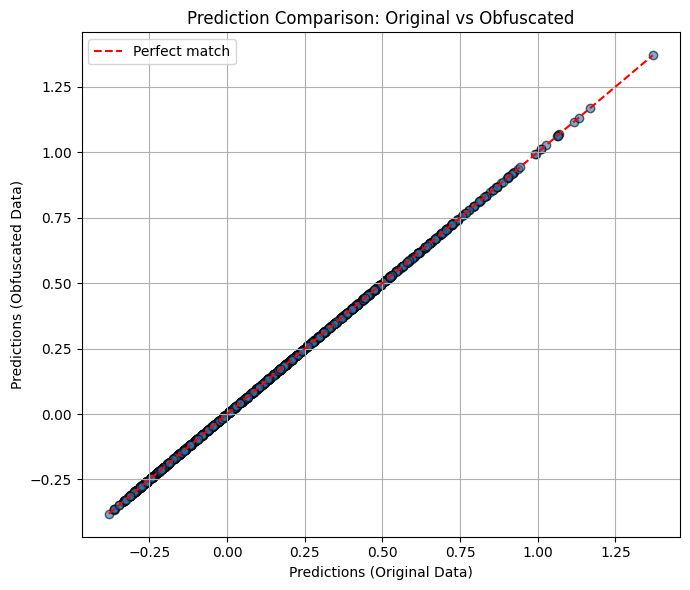

In [124]:
plt.figure(figsize=(7, 6))
plt.scatter(y_pred_orig, y_pred_obf, alpha=0.6, edgecolors='k')
plt.plot([y_pred_orig.min(), y_pred_orig.max()],
         [y_pred_orig.min(), y_pred_orig.max()],
         color='red', linestyle='--', label='Perfect match')

plt.xlabel("Predictions (Original Data)")
plt.ylabel("Predictions (Obfuscated Data)")
plt.title("Prediction Comparison: Original vs Obfuscated")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* Visualizing Predicition Comparison
* Each point is a predicition pair from both models
* The red dashed line is the perfefct match reference
* All points lie very close to this line confirming matching predictions
    
</div>

# Conclusions

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: lightgreen; color: black;">
    <h2>Comments</h2> 

* This project explored how machine learning techniques can assist Sure Tomorrow Insurance across four core tasks: identifying customer similarity for marketing, predicting insurance benefit eligibility and quantity, and securing personal data through obfuscation while preserving model performance.
* Task 1: Identifying Similar Cusotmers (Clustering & kNN)
    * Using PCA, we reduced the dimensionality of customer data to reveal clusters and group patterns not easily visible in raw form
    * Clear groupings emerged in the PCA space, indicating meaningful segmentation in customer characteristics—especially along the first principal component (PC1), which likely captures income, age, or family size
    * k-Nearest Neighbors (kNN) and distance-based similarity (Euclidean and Manhattan) effectively identified customer neighbors and grouped them into coherent clusters
    * Scaling had a critical impact: scaled data produced much more meaningful and consistent groupings, especially for distance-based methods
* Task 2: Classification – Predicting Insurance Benefit Eligibility
    * The dataset showed significant class imbalance (only ~12% received benefits), making accuracy alone misleading
    * Dummy models achieved very low F1-scores (0.00–0.21)
    * A kNN-based classifier significantly outperformed these baselines:
        * Best F1-score: 0.943 (scaled, k=1)
        * Scaling dramatically improved model stability and precision across all k values
        * Unscaled models performed poorly due to feature magnitude imbalance\
    * A scaled kNN classifier provides meaningful prediction of benefit eligibility, proving ML can outperform naive baselines even with imbalanced data
* Task 3: Regression – Predicting Number of Benefits
    * A custom linear regression model was built and tested with and without feature scaling
    * RMSE = 0.36 and $R^{²}$ ≈ 0.66 for both models
    * Scaling improved coefficient interpretability (especially for income), but predictions remained unchanged
    * Age emerged as the strongest predictor, with income and family size playing smaller roles
    * Linear regression moderately predicts the number of benefits. Scaling improves clarity, but model performance is inherently scale-invariant
* Task 4: Privacy-Preserving Data Obfuscation
    * Obfuscation was applied using an invertible random matrix 𝑃, transforming the feature matrix to $X^{′} = X ⋅ 𝑃$
    * Recovery of original data using $𝑋 = 𝑋^{′} ⋅ 𝑃^{−1}$ was confirmed to be accurate, with max recovery error < 1e-10, caused only by harmless floating-point rounding
     * Analytical and computational proofs showed that: $$\hat{y}P = \hat{y}$$ meaning predicted values are identical before and after obfuscation
    * RMSE and $R^{²}$ for both models matched exactly, and visualizations confirmed overlapping predictions
    * The obfuscated data is no longer interpretable, but model utility is fully preserved
    * Obfuscation is effective, secure, and has no negative impact on linear regression performance, making it a viable privacy-preserving transformation
* Overall Conclusion
    * The project demonstrated that machine learning can effectively support Sure Tomorrow Insurance in the following ways:
        * Customer similarity and segmentation can be accurately captured using clustering and kNN, especially with scaled data
        * Classification models (kNN) can predict benefit eligibility far better than dummy baselines when properly tuned and scaled
        * Linear regression provides meaningful prediction for benefit count, with consistent performance across original and scaled inputs
        *  Data obfuscation using invertible matrix transformations effectively protects personal data without compromising model accuracy
    * This confirms that Sure Tomorrow can responsibly and effectively apply machine learning, not only to improve decision-making but also to maintain data privacy and security
                                                                                                                            
                                                                                                                            
</div>